# pyds project Diabetes Prediction
**Ali Jokar**



در این تحلیل ما از الگوریتم‌های طبقه‌بندی برای پیش بینی وضعیت دیابت بیماران بر اساس سایر عوامل پیش بینی کننده استفاده می‌کنیم.

Variables Explained:

Diabetes_012: 0 = no diabetes 1 = prediabetes 2 = diabetes

HighBP: 0 = no high BP 1 = high BP

HighChol: 0 = no high cholesterol 1 = high cholesterol

CholCheck: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

BMI: Body Mass Index

Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

Stroke: (Ever told) you had a stroke. 0 = no 1 = yes

HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes

Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes

Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes

HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no

AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes

NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes

GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how

PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30

DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes Sex: 0 = female 1 = male

Age: 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

Education: Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8

Income: Income scale (INCOME2 see codebook) scale 1-8 1 = less than 10,000 dollar 5 = less than 35,000 dollar  8 = 75,000 dollar or more

# import libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Read data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/pyds/diabetes_012_health_indicators_BRFSS2015.csv'
diabete_data = pd.read_csv(file_path)

In [ ]:
diabete_data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
diabete_data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
for col in diabete_data.columns:
    print(col)

Diabetes_012
HighBP
HighChol
CholCheck
BMI
Smoker
Stroke
HeartDiseaseorAttack
PhysActivity
Fruits
Veggies
HvyAlcoholConsump
AnyHealthcare
NoDocbcCost
GenHlth
MentHlth
PhysHlth
DiffWalk
Sex
Age
Education
Income


# plot and visualizatiion

([<matplotlib.axis.XTick at 0x7ec07a5cef20>,
 [Text(0.3, 0, '0'), Text(1.0, 0, '1'), Text(1.7, 0, '2')])

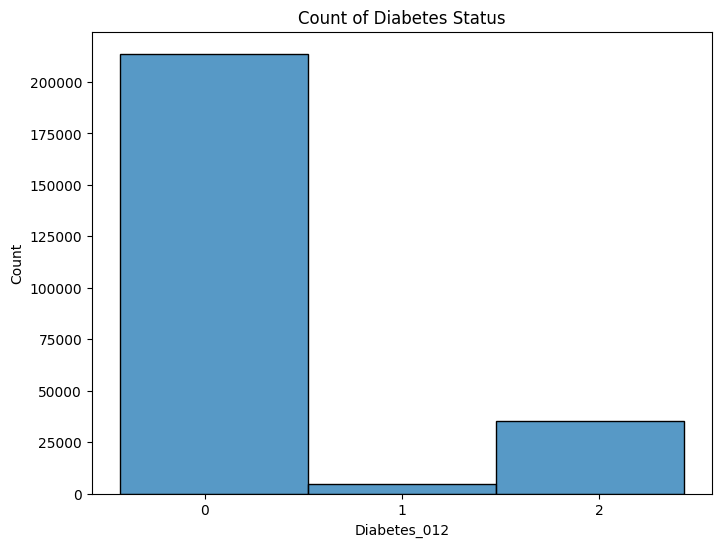

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(diabete_data['Diabetes_012'],bins=3).set(title='Count of Diabetes Status')

plt.xticks([0.3, 1, 1.7], ['0', '1', '2'])

با توجه به نمودار می‌بینیم که داده‌ها بسیار نامتوازن هستند و داده‌های گروه اول خیلی بیشتر از دو گروه دیگر است

برای این که مدل بتواند با داده‌های نامتوازن به درستی کار کند، باید تکنیک‌های مختلفی را برای متوازن کردن داده‌ها و جلوگیری از بایاس به کار برد. در زیر چند روش برای برخورد با داده‌های نامتوازن آورده شده است

1. Resampling Techniques:
a. Oversampling:
افزایش نمونه‌های کلاس‌های کمتر تا زمانی که تعداد آن‌ها با کلاس‌های دیگر برابر شود

 SMOTE (Synthetic Minority Over-sampling Technique) یکی از روش‌های رایج در این زمینه است

 b. Undersampling:
کاهش نمونه‌های کلاس‌های بیشتر تا زمانی که تعداد آن‌ها با کلاس‌های دیگر برابر شود. این روش می‌تواند به از دست دادن اطلاعات منجر شود، بنابراین باید با دقت استفاده شود

2. Combination of Over and Undersampling:
ترکیبی از oversampling و undersampling برای بهبود عملکرد مدل

3. Use Class Weights:
در برخی از مدل‌ها می‌توان از وزن‌دهی کلاس‌ها استفاده کرد تا مدل اهمیت بیشتری به کلاس‌های کمتر بدهد

4. Generate Synthetic Data:
تولید داده‌های مصنوعی برای کلاس‌های کمتر با استفاده از تکنیک‌هایی مانند GANs (Generative Adversarial Networks)

5. Data Augmentation:
افزایش داده‌ها با استفاده از روش‌های مختلف مانند نویز اضافه کردن، تغییر مقیاس و غیره

با استفاده از این روش‌ها می‌توان داده‌های خود را متوازن کرده و عملکرد مدل را بهبود بخشید

([<matplotlib.axis.XTick at 0x7ec079baada0>,
 [Text(0.25, 0, '0'), Text(0.75, 0, '1')])

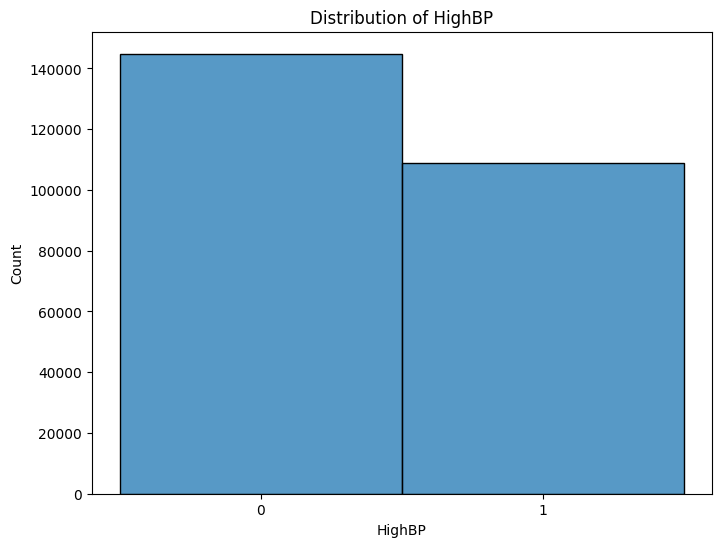

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(diabete_data['HighBP'],bins=2).set(title='Distribution of HighBP')
plt.xticks([0.25, 0.75], ['0', '1'])

([<matplotlib.axis.XTick at 0x7ec079c35570>,
 [Text(0.25, 0, '0'), Text(0.75, 0, '1')])

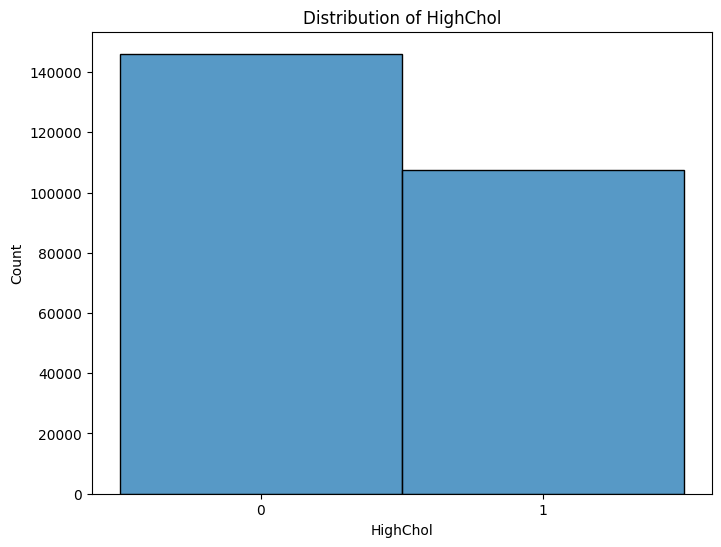

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(diabete_data['HighChol'],bins=2).set(title='Distribution of HighChol')
plt.xticks([0.25, 0.75], ['0', '1'])

([<matplotlib.axis.XTick at 0x7ec077383520>,
 [Text(0.25, 0, '0'), Text(0.75, 0, '1')])

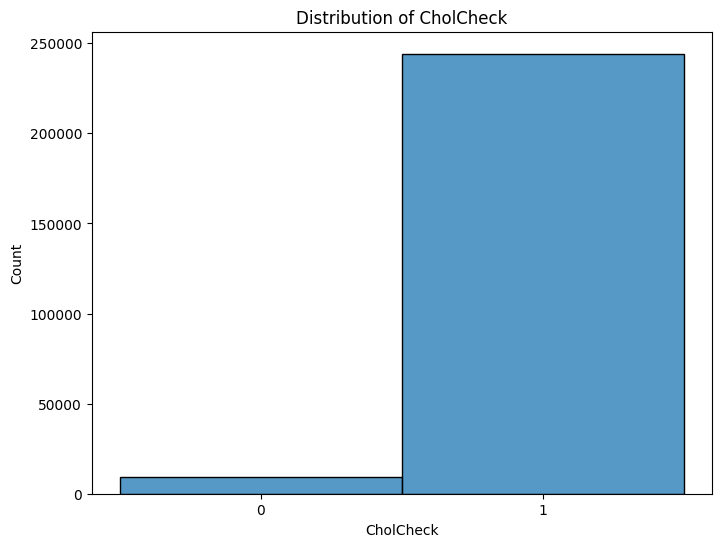

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(diabete_data['CholCheck'],bins=2).set(title='Distribution of CholCheck')
plt.xticks([0.25, 0.75], ['0', '1'])

[Text(0.5, 1.0, 'Distribution of BMI')]

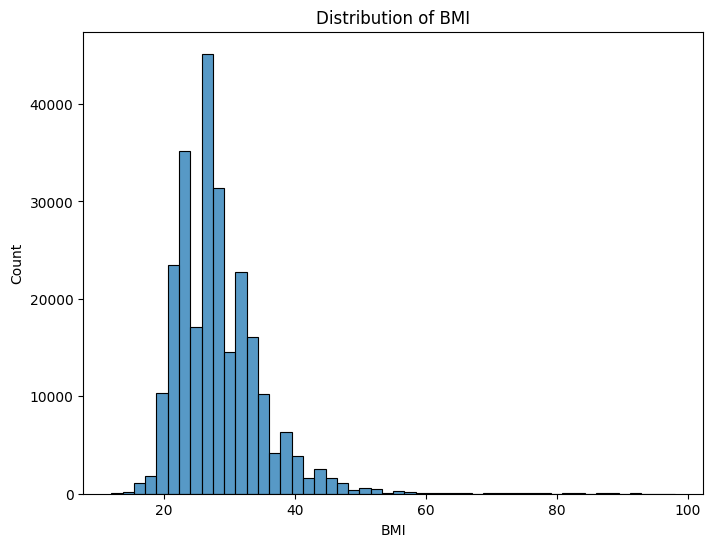

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(diabete_data['BMI'],bins=50).set(title='Distribution of BMI')

[Text(0.5, 1.0, 'Distribution of Age Group')]

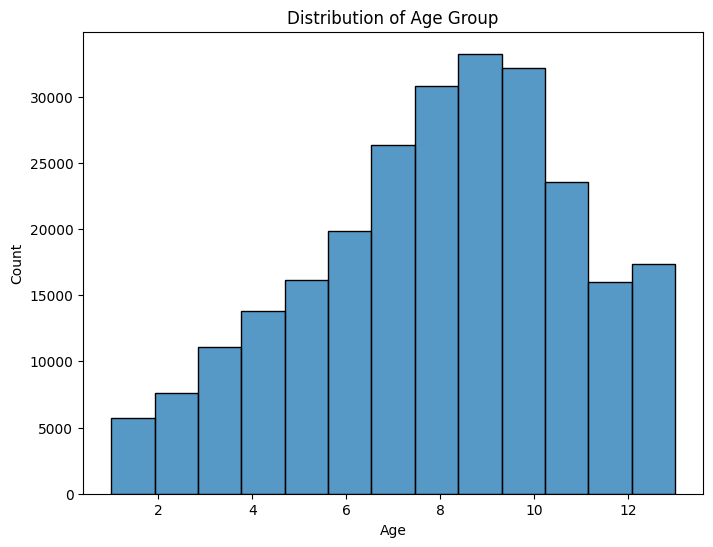

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(diabete_data['Age'], bins=13).set(title='Distribution of Age Group')

[Text(0.5, 1.0, 'Distribution of Education Group')]

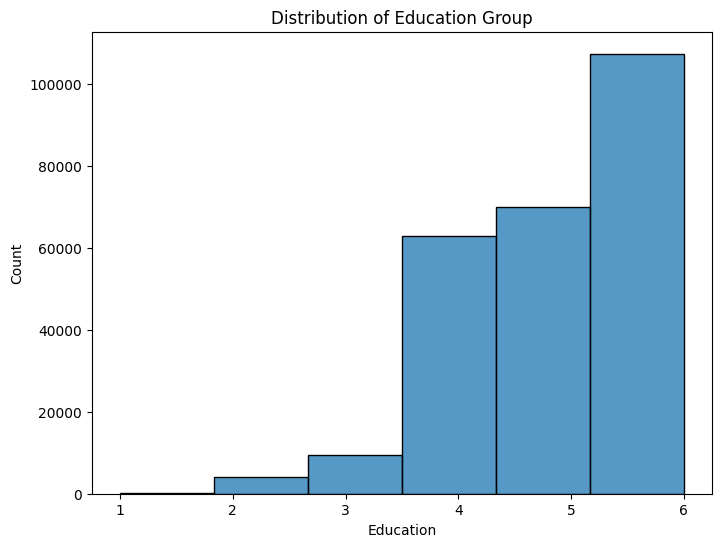

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(diabete_data['Education'],bins=6).set(title='Distribution of Education Group')

[Text(0.5, 1.0, 'Distribution of Income Group')]

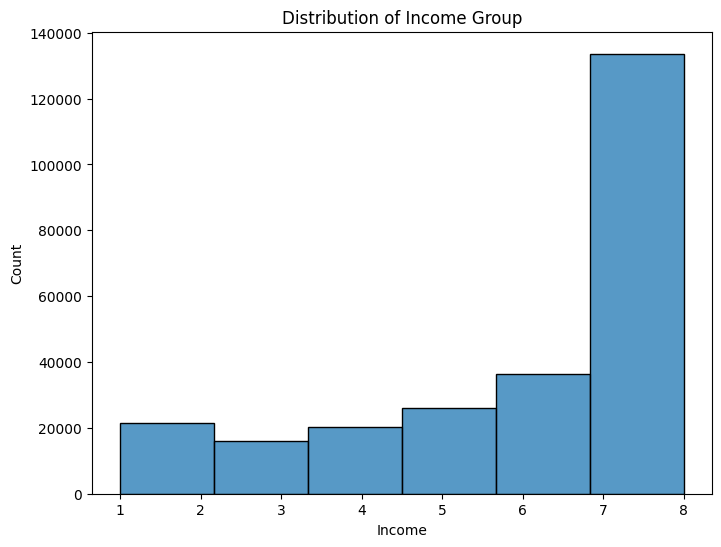

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(diabete_data['Income'],bins=6).set(title='Distribution of Income Group')

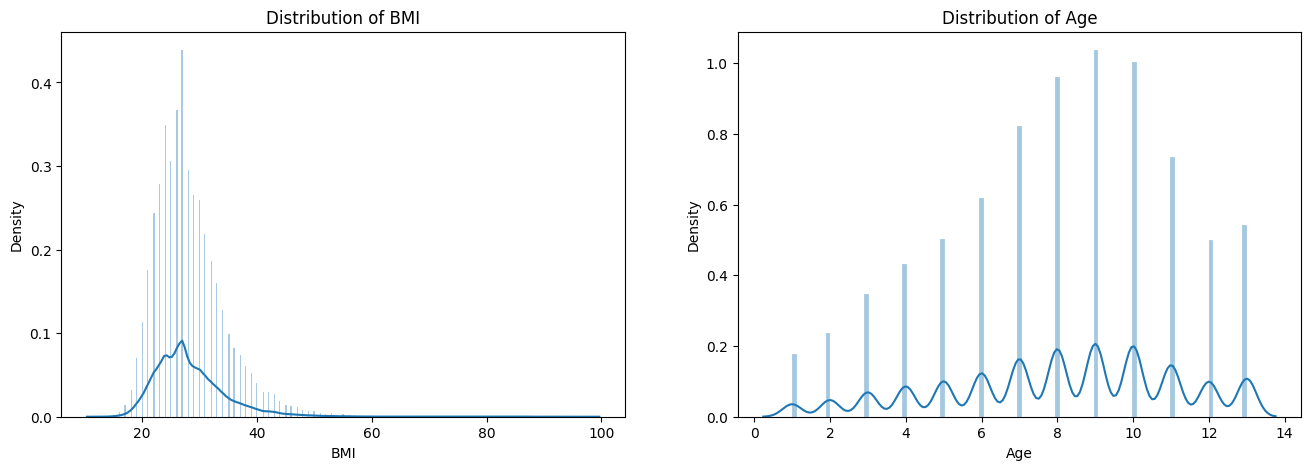

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title("Distribution of BMI")
sns.histplot(diabete_data["BMI"], kde=True, stat="density", kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4))
plt.subplot(1,2,2)
plt.title("Distribution of Age")
sns.histplot(diabete_data["Age"], kde=True, stat="density", kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4))
plt.show()

[Text(0.5, 1.0, 'Box plot of BMI')]

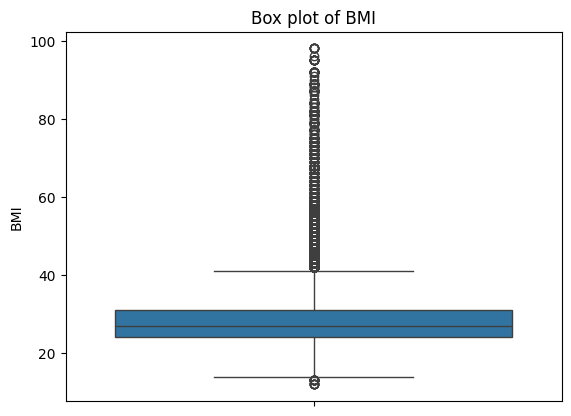

In [ ]:
sns.boxplot(diabete_data['BMI']).set(title='Box plot of BMI')

There are many outliers in BMI that should be removed

در این بخش آنهایی که شاخص توده بدنی از محدوده نرمال خارج بود را حذف کردیم

In [ ]:
percent_25 = diabete_data['BMI'].quantile(0.25)
percent_75 = diabete_data['BMI'].quantile(0.75)
Q = percent_75 - percent_25
upper_limit = percent_75 + 1.4 * Q
lower_limit = percent_25 - 1.4 * Q
diabete_data[diabete_data['BMI'] > upper_limit]
diabete_data[diabete_data['BMI'] < lower_limit]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1658,0.0,1.0,1.0,1.0,14.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,4.0,30.0,30.0,1.0,1.0,6.0,3.0,1.0
6785,1.0,0.0,1.0,1.0,14.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,5.0,30.0,28.0,1.0,0.0,8.0,6.0,3.0
8054,0.0,1.0,0.0,1.0,14.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,6.0,8.0
11062,0.0,0.0,0.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,5.0,14.0,1.0,0.0,12.0,4.0,5.0
11927,0.0,0.0,0.0,1.0,14.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,5.0,30.0,30.0,0.0,0.0,13.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237828,0.0,0.0,0.0,1.0,14.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,6.0,4.0,8.0
239607,0.0,0.0,0.0,1.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,1.0,0.0,7.0,4.0,3.0
240136,0.0,1.0,0.0,1.0,14.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,0.0,15.0,0.0,0.0,11.0,4.0,2.0
248109,0.0,0.0,1.0,1.0,13.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,6.0,8.0


In [ ]:
new_diabete_data = diabete_data[diabete_data['BMI'] < upper_limit]
new_diabete_data = new_diabete_data[diabete_data['BMI'] > lower_limit]
new_diabete_data.shape

<ipython-input-11-5d34f3d327bb>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_diabete_data = new_diabete_data[diabete_data['BMI'] > lower_limit]


(242133, 22)

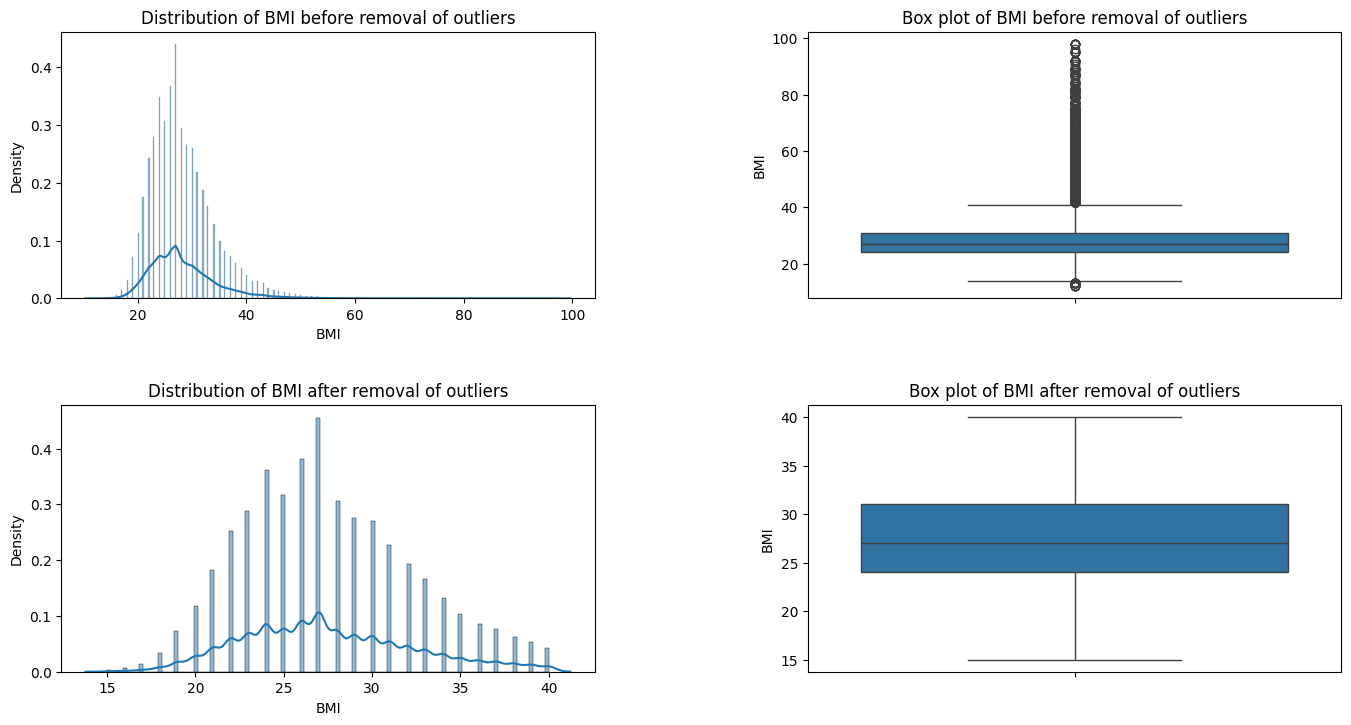

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(diabete_data['BMI'], kde=True, stat="density", kde_kws=dict(cut=3))
plt.title("Distribution of BMI before removal of outliers")
plt.subplot(2,2,2)
sns.boxplot(diabete_data['BMI'])
plt.title("Box plot of BMI before removal of outliers")

plt.subplot(2,2,3)
sns.histplot(new_diabete_data['BMI'], kde=True, stat="density", kde_kws=dict(cut=3))
plt.title("Distribution of BMI after removal of outliers")
plt.subplot(2,2,4)
sns.boxplot(new_diabete_data['BMI'])
plt.title("Box plot of BMI after removal of outliers")
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [ ]:
new_diabete_data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


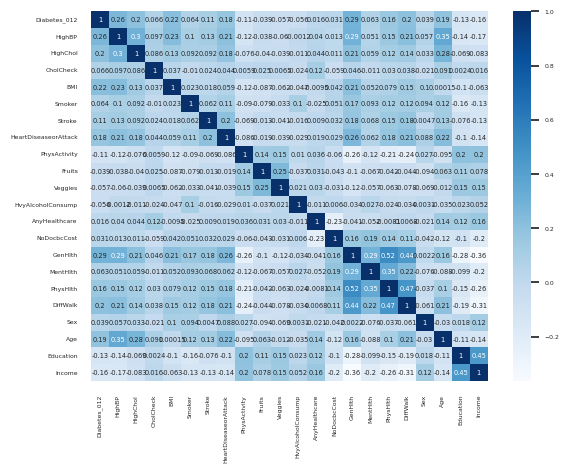

In [ ]:
sns.set(font_scale=0.4)

hm_new_diabete_data = new_diabete_data.copy()

cat_col = hm_new_diabete_data.select_dtypes(include = ['object']).columns.tolist()
label_encoder = LabelEncoder()

for col in cat_col :
    hm_new_diabete_data[col] = label_encoder.fit_transform(hm_new_diabete_data[col])

# Confusion Matrix for correltion
cm = sns.heatmap(hm_new_diabete_data.corr(), annot = True, cmap = 'Blues')
plt.show()

[Text(0.5, 1.0, 'Diabetes Status vs Age')]

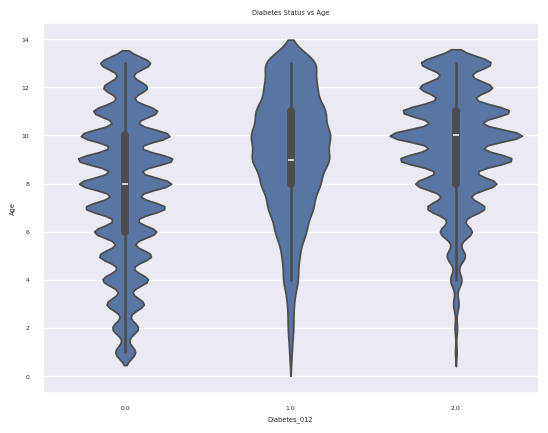

In [ ]:
sns.violinplot(x='Diabetes_012', y='Age', data=new_diabete_data) .set(title='Diabetes Status vs Age')

[Text(0.5, 1.0, 'Difficulty Walking vs. Physical Health')]

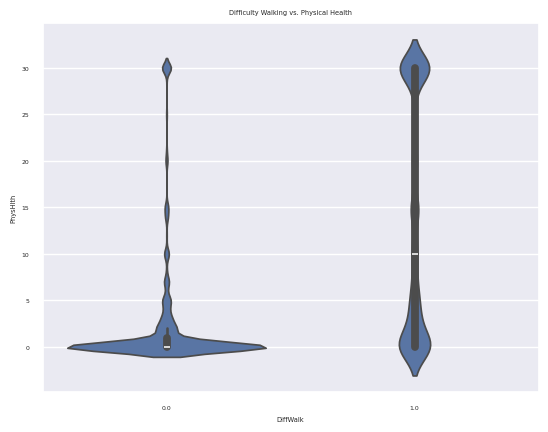

In [ ]:
sns.violinplot(x='DiffWalk', y='PhysHlth', data=new_diabete_data) .set(title='Difficulty Walking vs. Physical Health')

[Text(0.5, 1.0, 'Difficulty Walking vs. General Health')]

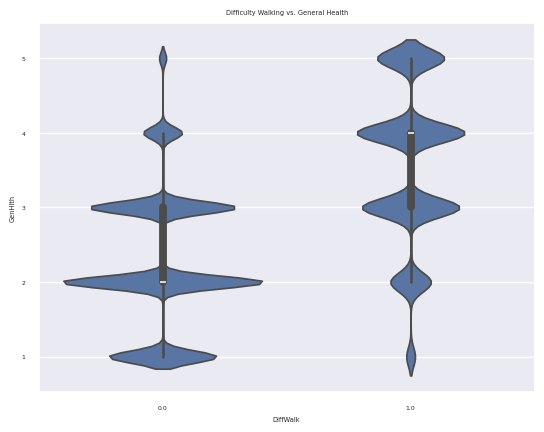

In [ ]:
sns.violinplot(x='DiffWalk', y='GenHlth', data=new_diabete_data) .set(title='Difficulty Walking vs. General Health')

[Text(0.5, 1.0, 'Physical Activity vs. Age')]

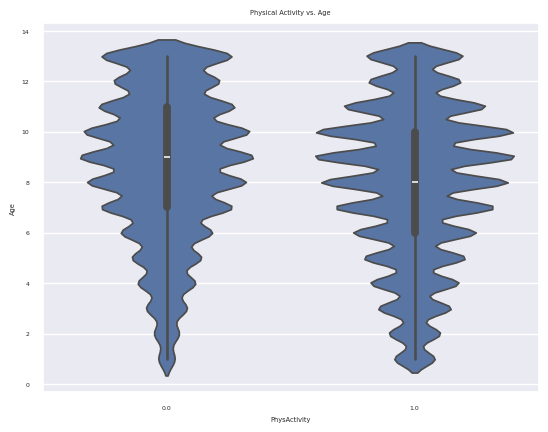

In [ ]:
sns.violinplot(x='PhysActivity', y='Age', data=new_diabete_data) .set(title='Physical Activity vs. Age')

[Text(0.5, 1.0, 'Distribution of Physical Health')]

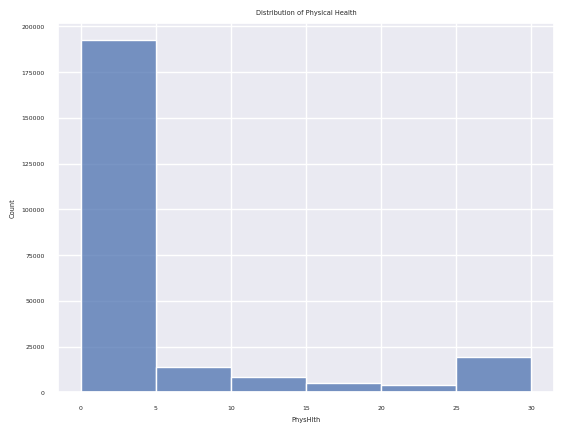

In [ ]:
sns.histplot(new_diabete_data['PhysHlth'],bins=6).set(title='Distribution of Physical Health')

[Text(0.5, 1.0, 'Distribution of general health')]

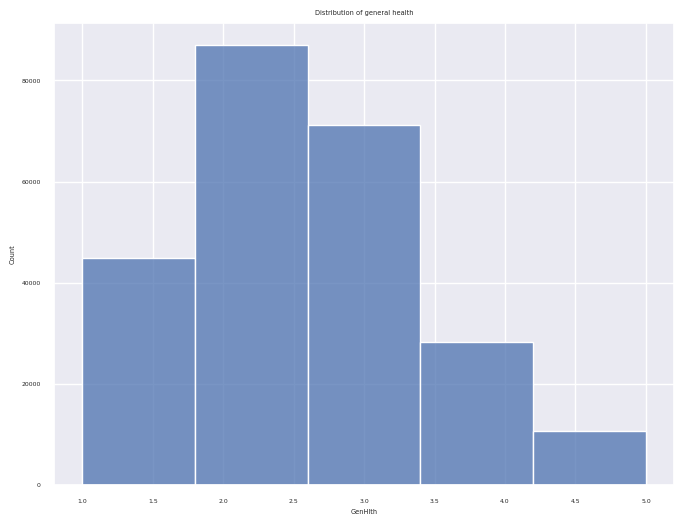

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(new_diabete_data['GenHlth'],bins=5).set(title='Distribution of general health')

# Section 1 (use random forest model and delete education , income)

دو پارامتر تحصیلات و درآمد که در دیابت تاثیری نداشتند را حذف کردیم

سپس همه داده ها را به شکل عددی تبدیل کرده و داده های آموزش و تست را ایجاد کردیم

In [ ]:
#removing columns that aren't relevant to calculations
new_diabete_data_predictions = new_diabete_data.drop(['Education', 'Income'], axis=1)

X = new_diabete_data_predictions.drop(['Diabetes_012'], axis=1)
Y = new_diabete_data_predictions['Diabetes_012']


In [ ]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0


In [ ]:
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diabetes_012, dtype: float64

In [ ]:
numerical = X.filter(['BMI', 'Age'])
numerical

,BMI,Age
0,40.0,9.0
1,25.0,7.0
2,28.0,9.0
3,27.0,11.0
4,24.0,11.0
...,...,...
253674,27.0,3.0
253676,18.0,11.0
253677,28.0,2.0
253678,23.0,7.0


In [ ]:
categorical = X.drop(['BMI', 'Age'], axis = 1)
categorical

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253674,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
253676,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0
253677,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
253678,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0


In [ ]:
cat_numerical = pd.get_dummies(categorical,drop_first=True)
cat_numerical.head()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0


In [ ]:
X = pd.concat([numerical, cat_numerical], axis = 1)
X.head()

,BMI,Age,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex
0,40.0,9.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0
1,25.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0
2,28.0,9.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0
3,27.0,11.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0
4,24.0,11.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,  test_size=0.20, random_state=42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform (x_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(193706, 19)
(48427, 19)
(193706,)
(48427,)


random forest model

class_weight= balanced:

این پارامتر به مدل می‌گوید که وزن کلاس‌های مختلف را به‌صورت خودکار بر اساس فراوانی آن‌ها تنظیم کند. اگر کلاس‌های داده نامتوازن باشند (یعنی تعداد نمونه‌های یک کلاس بسیار بیشتر از کلاس‌های دیگر باشد)، این تنظیم باعث می‌شود که مدل برای کلاس‌های کمتر شایع اهمیت بیشتری قائل شود و به این ترتیب از بایاس به سمت کلاس‌های غالب جلوگیری می‌کند.

n_estimators=500:

این پارامتر تعداد درخت‌هایی را که در جنگل تصادفی ساخته می‌شوند، مشخص می‌کند. هرچه تعداد درخت‌ها بیشتر باشد، مدل معمولاً دقت بالاتری خواهد داشت، اما این موضوع ممکن است به هزینه زمان اجرای بیشتر منجر شود. مدل از 500 درخت تصمیم برای ایجاد پیش‌بینی نهایی استفاده می‌کند.

random_state=42:

این پارامتر برای تعیین یک نقطه شروع تصادفی خاص در ساختار مدل استفاده می‌شود تا نتایج مدل در اجرای‌های مختلف قابل تکرار باشد. وقتی مقدار random_state مشخص می‌شود، هر بار که مدل اجرا می‌شود، نتایج یکسان خواهند بود.

Metrics for RandomForestClassifier


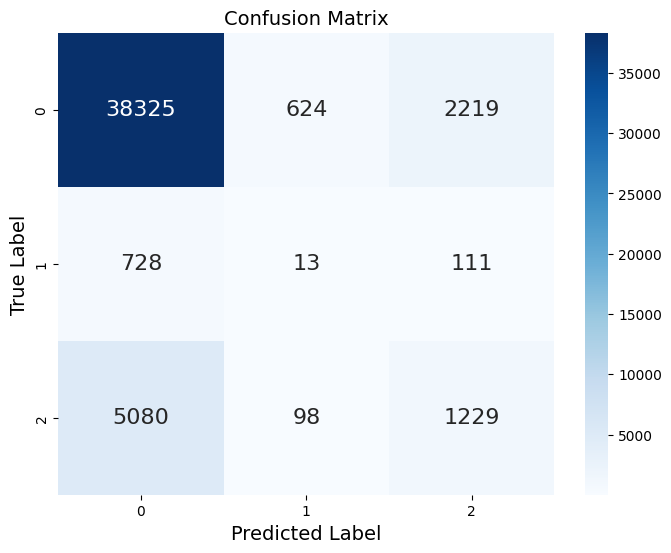

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     41168
         1.0       0.02      0.02      0.02       852
         2.0       0.35      0.19      0.25      6407

    accuracy                           0.82     48427
   macro avg       0.41      0.38      0.39     48427
weighted avg       0.78      0.82      0.80     48427

accuracy score: 0.8170442108740992


In [ ]:
model = RandomForestClassifier(class_weight='balanced',n_estimators=500,random_state=42)
classifier = model.fit(x_train,y_train)

y_pred = classifier.predict(x_test)

print('Metrics for RandomForestClassifier')

conf_matrix = confusion_matrix(y_test,y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

print(classification_report(y_test,y_pred))

print("accuracy score:",accuracy_score(y_test, y_pred))


با توجه به نامتوازن بودن داده ها می بینیم که مقدار نمره f1 برای گروه های 1 و2 بسیار پایین است

# Section 2 ( decision tree classifier with resampling but without previous process on data)

در این بخش می بینیم که اگر از resampling استفاده کنیم

مقدار f1_score برای کلاس های 1 و 2 نیز به مقدار بالایی می رسد و مشکل نامتوازن بودن داده ها را می توان با این روش بهبود بخشید

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# read data
file_path = '/content/drive/MyDrive/pyds/diabetes_012_health_indicators_BRFSS2015.csv'
diabete_data_2 = pd.read_csv(file_path)

# Remove duplicate data for class 0
diabete_data_2 = diabete_data_2.drop_duplicates()
diabete_data_2 = diabete_data_2[~((diabete_data_2.duplicated()) & (diabete_data_2['Diabetes_012'] == 0))]

# Remove outliers
percent_25 = diabete_data_2['BMI'].quantile(0.25)
percent_75 = diabete_data_2['BMI'].quantile(0.75)
Q = percent_75 - percent_25
upper_limit = percent_75 + 1.4 * Q
lower_limit = percent_25 - 1.4 * Q
diabete_data_2 = diabete_data_2[(diabete_data_2['BMI'] < upper_limit) & (diabete_data_2['BMI'] > lower_limit)]

# x, y split
X = diabete_data_2.drop('Diabetes_012', axis=1)
y = diabete_data_2['Diabetes_012']

#  use SMOTE for oversampling data of classes 1 and 2
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# train val test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# evaluation
def evaluate_model(model, X_test, y_test):
    y_test_pred = model.predict(X_test)

    print("Test Set Evaluation:")
    print(classification_report(y_test, y_test_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

    # confiusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()

    print("accuracy score:", accuracy_score(y_test, y_test_pred))


In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

Metrics for DecisionTreeClassifier
Test Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85     37326
         1.0       0.90      0.93      0.92     37212
         2.0       0.81      0.80      0.80     37013

    accuracy                           0.86    111551
   macro avg       0.86      0.86      0.86    111551
weighted avg       0.86      0.86      0.86    111551

Confusion Matrix:
 [[31229   941  5156]
 [  714 34594  1904]
 [ 4473  2860 29680]]


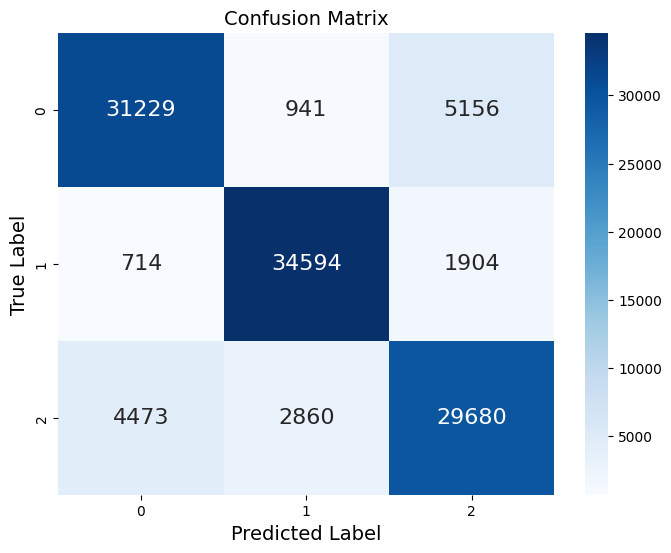

accuracy score: 0.8561375514338733


In [ ]:
print('Metrics for DecisionTreeClassifier')
evaluate_model(dt_model, X_test, y_test)

# Section 3 ( comparison of models )

در این بخش چندین مدل را با هم استفاده کردیم و نتایج هر یک از مدل ها را بر روی دادگان تست کردیم تا بتوانیم مدل ها را با هم مقایسه کنیم

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# read data
file_path = '/content/drive/MyDrive/pyds/diabetes_012_health_indicators_BRFSS2015.csv'
diabete_data_3 = pd.read_csv(file_path)

# Remove duplicate data for class 0
diabete_data_3 = diabete_data_3.drop_duplicates()
diabete_data_3 = diabete_data_3[~((diabete_data_3.duplicated()) & (diabete_data_3['Diabetes_012'] == 0))]

# Remove outliers
percent_25 = diabete_data_3['BMI'].quantile(0.25)
percent_75 = diabete_data_3['BMI'].quantile(0.75)
Q = percent_75 - percent_25
upper_limit = percent_75 + 1.4 * Q
lower_limit = percent_25 - 1.4 * Q
diabete_data_3 = diabete_data_3[(diabete_data_3['BMI'] < upper_limit) & (diabete_data_3['BMI'] > lower_limit)]

# drop education and income
diabete_data_3 = diabete_data_3.drop(['Education', 'Income'], axis=1)

# x, y split
X = diabete_data_3.drop('Diabetes_012', axis=1)
y = diabete_data_3['Diabetes_012']

# filter numerical and categorical
numerical = X.filter(['BMI', 'Age'])
categorical = X.drop(['BMI', 'Age'], axis=1)

# convert cat to num
cat_numerical = pd.get_dummies(categorical, drop_first=True)

# concat data
X = pd.concat([numerical, cat_numerical], axis=1)

#  use SMOTE for oversampling data of classes 1 and 2
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# train val test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# evaluation
def evaluate_model(model, X_test, y_test):
    y_test_pred = model.predict(X_test)

    print("Test Set Evaluation:")
    print(classification_report(y_test, y_test_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

    # confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()

    print("accuracy score:", accuracy_score(y_test, y_test_pred))

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(446200, 19)
(111551, 19)
(446200,)
(111551,)


مدل درخت تصمیم که برای آن فقط نقطه شروع تصادفی خاص را تنظیم کردیم و نتایج آن تقریبا نزدیک رندم فارست است

Metrics for DecisionTreeClassifier
Test Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85     37326
         1.0       0.92      0.93      0.93     37212
         2.0       0.82      0.80      0.81     37013

    accuracy                           0.86    111551
   macro avg       0.86      0.86      0.86    111551
weighted avg       0.86      0.86      0.86    111551

Confusion Matrix:
 [[31869   774  4683]
 [  794 34713  1705]
 [ 4942  2296 29775]]


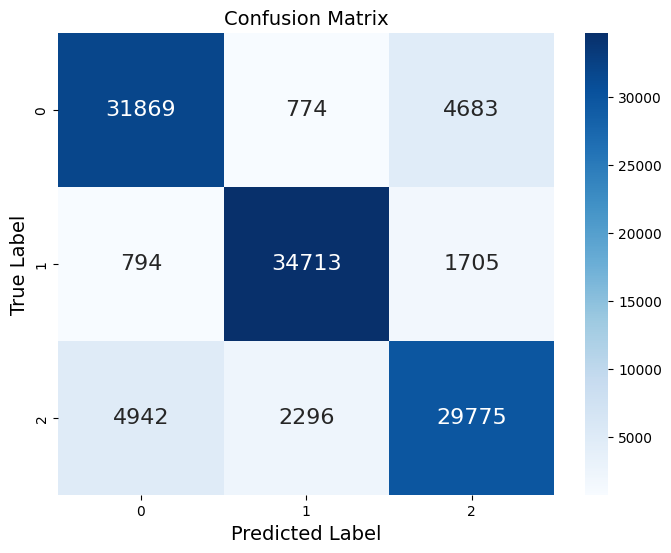

accuracy score: 0.8637932425527337


In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
print('Metrics for DecisionTreeClassifier')
evaluate_model(dt_model, X_test, y_test)

از یک مدل شبکه عصبی با لایه های مخفی 100 و 50 و 50 استفاده کردیم که می بینیم نتایج آن از دیگر مدل ها ضعیف تر بوده است

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Metrics for Neural Network
Test Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82     37326
         1.0       0.78      0.84      0.81     37212
         2.0       0.75      0.63      0.68     37013

    accuracy                           0.77    111551
   macro avg       0.77      0.77      0.77    111551
weighted avg       0.77      0.77      0.77    111551

Confusion Matrix:
 [[31717  1467  4142]
 [ 2188 31245  3779]
 [ 6295  7571 23147]]


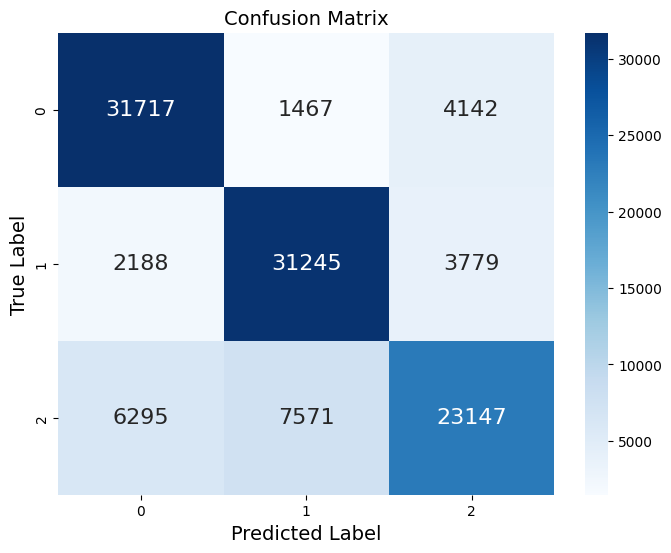

accuracy score: 0.7719249491264085


In [ ]:
# Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50, 50), random_state=42, max_iter=300)
nn_model.fit(X_train, y_train)
print('Metrics for Neural Network')
evaluate_model(nn_model, X_test, y_test)


از یک مدل نزدیک ترین همسایه استفاده کردیم ولی نتایج چندان تغییری نداشت و کمی هم ضعیف تر بود

Metrics for KNN
Test Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.84      0.79      0.81     37326
         1.0       0.87      0.97      0.92     37212
         2.0       0.81      0.76      0.79     37013

    accuracy                           0.84    111551
   macro avg       0.84      0.84      0.84    111551
weighted avg       0.84      0.84      0.84    111551

Confusion Matrix:
 [[29412  1851  6063]
 [  600 36203   409]
 [ 5123  3654 28236]]


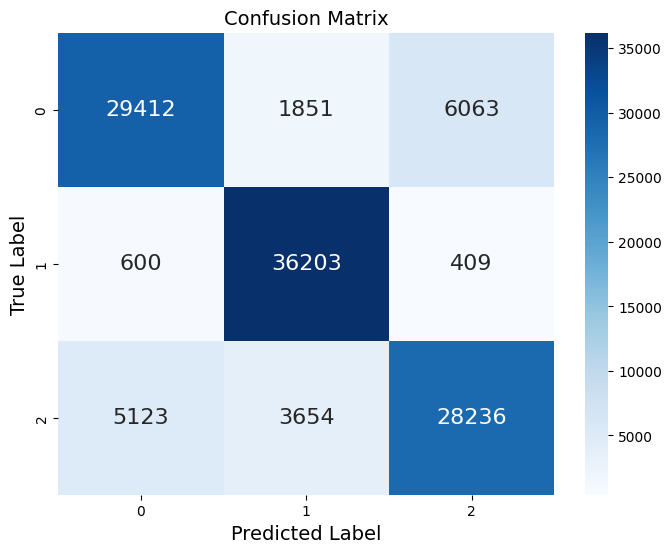

accuracy score: 0.8413281817285367


In [ ]:
# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print('Metrics for KNN')
evaluate_model(knn_model, X_test, y_test)

از مدل بیزی نیز استفاده کردیم که اصلا نتیجه خوبی نداشت و مشخص شد برای این پیش بینی اصلا مدل مناسبی نیست

Metrics for Naive Bayes
Test Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.64      0.48      0.55     37326
         1.0       0.41      0.40      0.41     37212
         2.0       0.48      0.62      0.54     37013

    accuracy                           0.50    111551
   macro avg       0.51      0.50      0.50    111551
weighted avg       0.51      0.50      0.50    111551

Confusion Matrix:
 [[18046 10300  8980]
 [ 6578 14862 15772]
 [ 3581 10665 22767]]


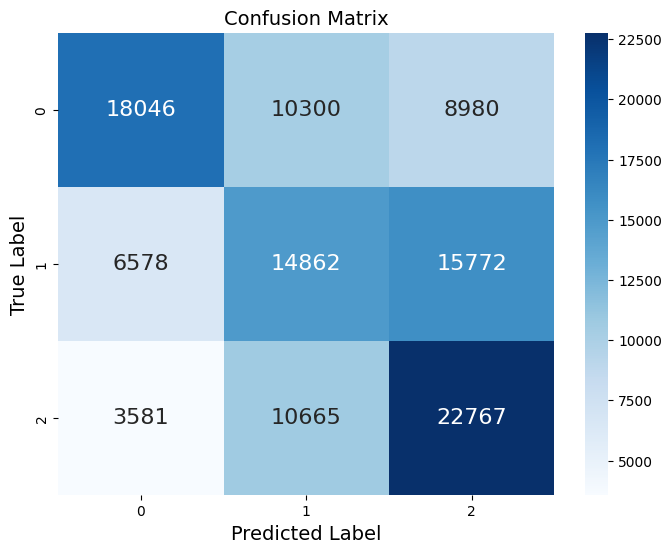

accuracy score: 0.49909906679456034


In [ ]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
print('Metrics for Naive Bayes')
evaluate_model(nb_model, X_test, y_test)

# Section 4 ( Dimension reduction and comparison of models )

در این بخش ابتدا با یک مدل کاهش ابعاد بعدهای مقادیر ورودی را به 10 کاهش دادیم و بعد به مدل های پیش بینی کننده دادیم تا آموزش ببینند و خب نتایج تقریبا با قسمت قبل یکسان بود اما می توان متوجه شد که خیلی از ویژگی ها تاثیر چندانی در پیش بینی نداشتند اما به طور کلی نتایج کمی ضعیف تر شده اند

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# read data
file_path = '/content/drive/MyDrive/pyds/diabetes_012_health_indicators_BRFSS2015.csv'
diabete_data_4 = pd.read_csv(file_path)

# Remove duplicate data for class 0
diabete_data_4 = diabete_data_4.drop_duplicates()
diabete_data_4 = diabete_data_4[~((diabete_data_4.duplicated()) & (diabete_data_4['Diabetes_012'] == 0))]

# Remove outliers
percent_25 = diabete_data_4['BMI'].quantile(0.25)
percent_75 = diabete_data_4['BMI'].quantile(0.75)
Q = percent_75 - percent_25
upper_limit = percent_75 + 1.4 * Q
lower_limit = percent_25 - 1.4 * Q
diabete_data_4 = diabete_data_4[(diabete_data_4['BMI'] < upper_limit) & (diabete_data_4['BMI'] > lower_limit)]

# drop education and income
diabete_data_4 = diabete_data_4.drop(['Education', 'Income'], axis=1)

# x, y split
X = diabete_data_4.drop('Diabetes_012', axis=1)
y = diabete_data_4['Diabetes_012']

# filter numerical and categorical
numerical = X.filter(['BMI', 'Age'])
categorical = X.drop(['BMI', 'Age'], axis=1)

# convert cat to num
cat_numerical = pd.get_dummies(categorical, drop_first=True)

# concat data
X = pd.concat([numerical, cat_numerical], axis=1)

#  use SMOTE for oversampling data of classes 1 and 2
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# train val test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# dimension reduction using  PCA
pca = PCA(n_components=10)  # 10 feature
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)




# evaluation
def evaluate_model(model, X_test, y_test):
    y_test_pred = model.predict(X_test)

    print("Test Set Evaluation:")
    print(classification_report(y_test, y_test_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

    # confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()

    print("accuracy score:", accuracy_score(y_test, y_test_pred))


Metrics for RandomForestClassifier
Test Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83     37326
         1.0       0.89      0.94      0.91     37212
         2.0       0.79      0.80      0.79     37013

    accuracy                           0.85    111551
   macro avg       0.85      0.85      0.85    111551
weighted avg       0.85      0.85      0.85    111551

Confusion Matrix:
 [[29838  1179  6309]
 [  601 35037  1574]
 [ 4266  3209 29538]]


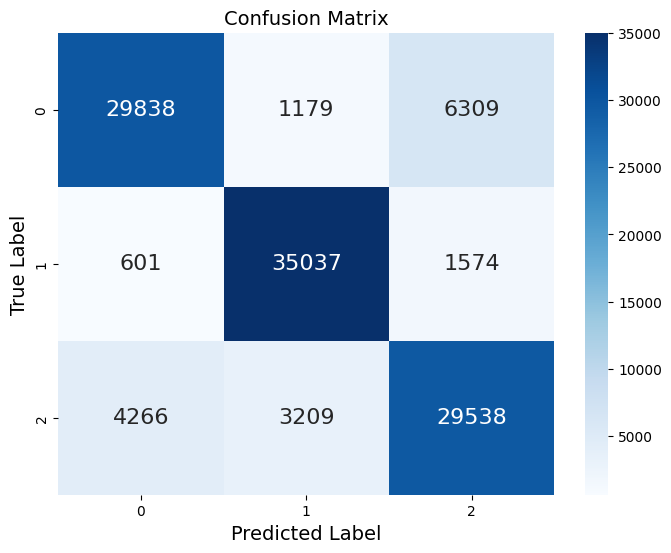

accuracy score: 0.8463662360713934


In [ ]:
# Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_pca, y_train)
print('Metrics for RandomForestClassifier')
evaluate_model(rf_model, X_test_pca, y_test)

Metrics for DecisionTreeClassifier
Test Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.74      0.74      0.74     37326
         1.0       0.79      0.82      0.81     37212
         2.0       0.68      0.66      0.67     37013

    accuracy                           0.74    111551
   macro avg       0.74      0.74      0.74    111551
weighted avg       0.74      0.74      0.74    111551

Confusion Matrix:
 [[27761  2671  6894]
 [ 2421 30502  4289]
 [ 7396  5308 24309]]


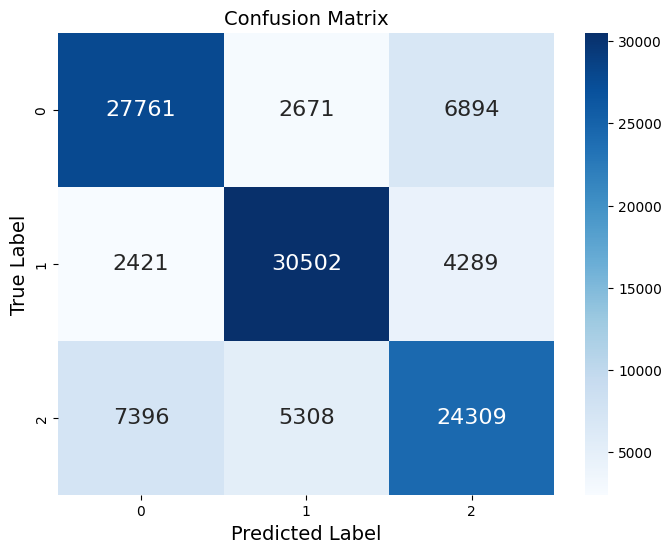

accuracy score: 0.7402174790006365


In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_pca, y_train)
print('Metrics for DecisionTreeClassifier')
evaluate_model(dt_model, X_test_pca, y_test)

Metrics for Naive Bayes
Test Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.60      0.40      0.48     37326
         1.0       0.38      0.56      0.46     37212
         2.0       0.51      0.44      0.47     37013

    accuracy                           0.47    111551
   macro avg       0.50      0.47      0.47    111551
weighted avg       0.50      0.47      0.47    111551

Confusion Matrix:
 [[14879 17109  5338]
 [ 5695 20837 10680]
 [ 4233 16375 16405]]


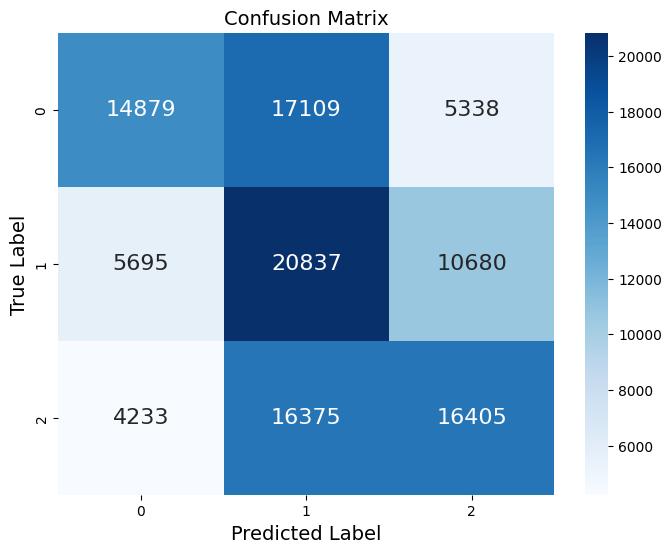

accuracy score: 0.4672392000071716


In [ ]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_pca, y_train)
print('Metrics for Naive Bayes')
evaluate_model(nb_model, X_test_pca, y_test)

Metrics for KNN
Test Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79     37326
         1.0       0.82      0.95      0.88     37212
         2.0       0.78      0.69      0.73     37013

    accuracy                           0.80    111551
   macro avg       0.80      0.80      0.80    111551
weighted avg       0.80      0.80      0.80    111551

Confusion Matrix:
 [[28696  2400  6230]
 [  914 35284  1014]
 [ 5765  5567 25681]]


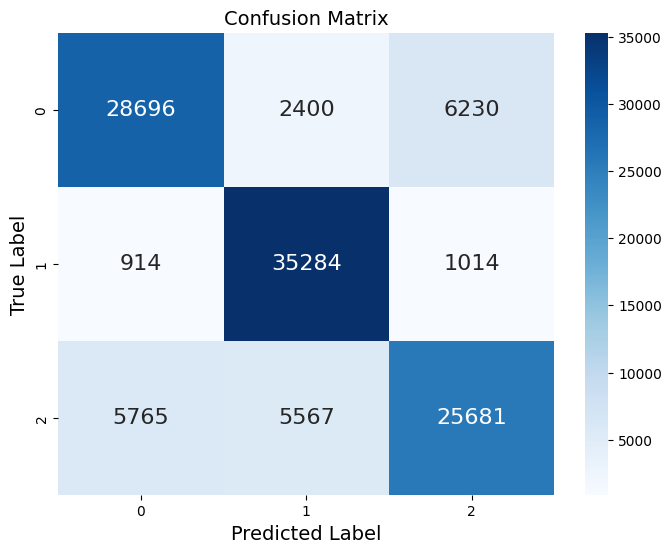

accuracy score: 0.8037668868947836


In [ ]:
# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_pca, y_train)
print('Metrics for KNN')
evaluate_model(knn_model, X_test_pca, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Metrics for Neural Network
Test Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78     37326
         1.0       0.75      0.80      0.77     37212
         2.0       0.67      0.61      0.64     37013

    accuracy                           0.73    111551
   macro avg       0.73      0.73      0.73    111551
weighted avg       0.73      0.73      0.73    111551

Confusion Matrix:
 [[29446  2025  5855]
 [ 2406 29794  5012]
 [ 6592  7971 22450]]


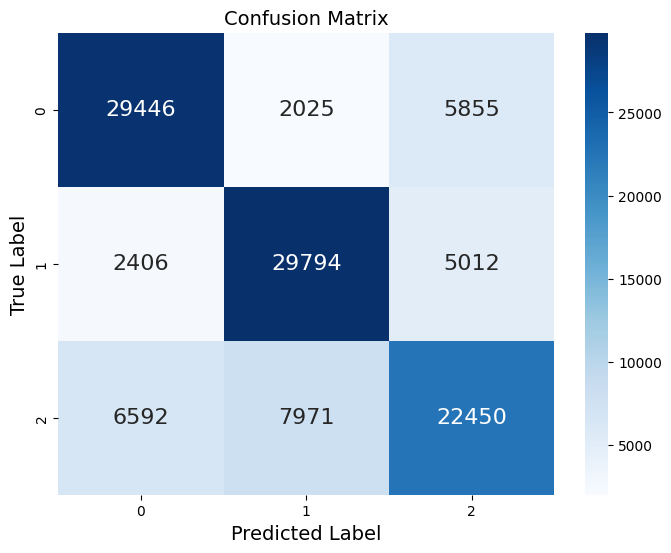

accuracy score: 0.7323107816155839


In [ ]:
# Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100, 100, 50, 50), random_state=42, max_iter=300)
nn_model.fit(X_train_pca, y_train)
print('Metrics for Neural Network')
evaluate_model(nn_model, X_test_pca, y_test)


 پاسخ به پرسش‌ها

1.       آیا نتایج نظرسنجی BRFSS شانسی برای ارائه یک پیش‌بینی قابل قبول از وضعیت فرد دارد؟برای پاسخ به این سوال یک بررسی توصیفی کفایت می‌کند، نیازی به مدلسازی برای پاسخ به این سوال نیست. (سعی کنید با بررسی نحوه توزیع گروه‌های مختلف (دیابت/پیش‌دیابت/ عدم دیابت) در رابطه با مقادیر مختلف ویژگی‌های نمونه‌های موجود، به یک توصیف کیفی و کمی برسید).

با توجه به توزیع هایی که از داده ها دیدیم دادگان خیلی نامتوازن بودند و این وضوع در پیش بینی صحیح مشکل ایجاد می کند اما به طور کلی اگر دادگان به دقت و به تعداد مناسب باشند و تست ها نیز دقیق باشد و داده ها درست و متوازن باشند می توان با استفاده از دادگان پیش بینی قابل قبولی با استفاده از یادگیری ماشین برای دیابت افراد انجام داد

2.      آیا توازن و تعداد کلاس‌های متغیر هدف (ابتلا و عدم ابتلا به دیابت) به یکدیگر نزدیک است؟ عدم توازن کلاس‌های متغیر هدف چه تاثیری بر مدلسازی خواهد داشت؟

خیر دادگان نامتوازن هستند و این عدم توازن باعث می شود مدل روی همه دادگان آموزش ندیده باشد و بیشتر داده هایی که دیده است مربوط به یک کلاس خاص هستند و در موقعی که میخواهیم دقت را برای آن بدست آوریم دقت بالا خواهد بود چون داده ها همگی مربوط به کلاسی هستند که تعداد زیادی دارد و خب مشخص نمی شود که مدل همه کلاس ها را دارد درست پیش بینی می کند و عملا دقت معیار مناسبی نیست و برای اینکه بررسی شود معمولا از معیار f1_score استفاده می شود که دقت هر کلاس  را جداگانه بررسی می کند

3.     با توجه به پاسخی که به پرسش  قبل دادید آیا تلفیق کلاس پیش‌دیابت و دیابت می‌تواند تصمیم معقولی باشد؟ اگر بله، این دو دسته را برای پاسخ به سوالات بعدی با یکدیگر ادغام کنید.

بله می تواند معقول باشد در صورتی که بخواهیم فقط دسته بندی دو کلاسه انجام دهیم و فقط ابتلا و عدم ابتلا را گزارش کنیم

4.     حتی پس از تلفیق کلاس‌های دیابت و پیش‌دیابت، باز هم ممکن است توازن دو کلاس ایجاد شده (عدم دیابت / دیابت) یکسان نباشد. برای حل مسئله عدم توازن کلاس‌های متغیر هدف چه راهکاری را در پیش می‌گیرید؟

برای این مشکل ما راهکار oversampling را در پیش گرفتیم و دیدیم که داده ها متوازن‌تر شدند و نتایج نیز برای دو کلاس دیگر نیز بهتر شد و f1_score برای آنها هم حداقل به نزدیک 80 درصد رسید



7.     مهم‌ترین متغیرها در پیش‌بینی دیابت کدام متغیرها هستند؟

سن و اعتیاد یا عدم اعتیاد و مصرف سبزیجات و میوه ها و سلامتی جسمانی و ورزش کردن و شاخص توده بدنی

8.     کدام متغیرها در پیش‌بینی دیابت نقشی بازی نمی‌کنند و بهتر از است آن‌ها را از مدل نهایی حذف کنیم تا اطلاعات غیرضروری از کاربر دریافت نکنیم؟

درآمد و تحصیلات افراد از آن جمله متغیرهایی هستند که هیچ اطلاعاتی اضافه نمی کنند

9.      مدل خود را برای خودتان و چند نفر از دوستانتان تست کنید و خطر ابتلا به دیابت را به آن‌ها گزارش کنید. آیا پاسخ‌ها معقول است؟

بله به طور تقریبی و با دقتی نزدیک به دقت به دست آمده معقول است

10.    آیا مدل شما می‌تواند در مدت زمان معقولی (مثلا در کمتر یک ثانیه) پاسخ خود را ارائه کند؟ مدل خود را از نظر حجم پردازش مورد نیاز و در هر پیش‌بینی و پیچیدگی محاسباتی آن تحلیل کنید.

معمولا مدل های سبک‌تر که از دقت بالایی برخوردار باشند می توانند سریع‌تر عمل کنند مدل های درخت تصمیم و رندم فارست در این مسئله عملکرد خوب و قابل قبولی دارند و سرعت مناسبی نیز دارند و از آن‌ها می‌توان برای پیش بینی دیابت استفاده کرد